In [1]:
# Importing Modules that will be used
#Nump, pandas, scipy, math, matpolotlib
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
from sklearn.preprocessing import LabelEncoder

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt

#cross validation
from sklearn.model_selection import train_test_split


In [2]:
#Importing Data provided by Capital One
data = pd.read_csv("default_of_cc_clients.csv", header=1)

In [3]:
#Quick Screening of the data
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [5]:
#Renaming columns for better understanding
data['default'] = data['default payment next month']
data = data.drop(['ID','default payment next month'], axis=1)

In [6]:
#Early Pre-Processing
data = data.drop_duplicates()

In [7]:
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [8]:
data.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  29965 non-null  int64 
 1   SEX        29965 non-null  object
 2   EDUCATION  29965 non-null  object
 3   MARRIAGE   29965 non-null  int64 
 4   AGE        29965 non-null  int64 
 5   PAY_0      29965 non-null  int64 
 6   PAY_2      29965 non-null  int64 
 7   PAY_3      29965 non-null  int64 
 8   PAY_4      29965 non-null  int64 
 9   PAY_5      29965 non-null  int64 
 10  PAY_6      29965 non-null  int64 
 11  BILL_AMT1  29965 non-null  int64 
 12  BILL_AMT2  29965 non-null  int64 
 13  BILL_AMT3  29965 non-null  int64 
 14  BILL_AMT4  29965 non-null  int64 
 15  BILL_AMT5  29965 non-null  int64 
 16  BILL_AMT6  29965 non-null  int64 
 17  PAY_AMT1   29965 non-null  int64 
 18  PAY_AMT2   29965 non-null  int64 
 19  PAY_AMT3   29965 non-null  int64 
 20  PAY_AMT4   29965 non-null  i

In [10]:
# We no longer have 30,000 datapoints, that is because some were duplicates

In [11]:
#We have to convert all objects and categorical values into binary integers for our regression to work
data['SEX'].describe()

count      29965
unique         2
top       female
freq       18091
Name: SEX, dtype: object

In [12]:
data['MARRIAGE'].describe()

count    29965.000000
mean         1.551877
std          0.521997
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: MARRIAGE, dtype: float64

In [13]:
data['default'].describe()

count           29965
unique              2
top       not default
freq            23335
Name: default, dtype: object

In [14]:
data['EDUCATION'].describe()

count          29965
unique             4
top       university
freq           14019
Name: EDUCATION, dtype: object

In [15]:
#WE'll create one more dataset with the original data for EDA purposes
dataog = data

In [16]:
#"Sex", "Education", and "Default" have to be converted to binary integers since ther are objects
#"Marriage" looks more like a discrete value than a continuos value so we have to convert that as well

In [17]:
#Before converting "Marriage" into dummy values we have to make it an object
data['MARRIAGE'] = data.MARRIAGE.astype(object)

In [18]:
#Now let's convert all this columns into binary discrete values so we can work with, them, using Label Encoder
le = LabelEncoder()
le.fit(data['SEX'])
data['SEX'] = le.transform(data['SEX'])
le.fit(data['default'])
data['default'] =le.transform(data['default'])

In [19]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,0,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,0
1,120000,0,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,90000,0,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,50000,0,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,50000,1,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,1


In [20]:
# Based on the head comparison from before and after we can know the  following:
# FEMALE =0 and MALE=1
# Default =0, non-default =1

In [21]:
#Now we can use One hot encode for "MARRIAGE" and "Education"
data = pd.get_dummies(data)

In [22]:
#Let's also make the Mmarriage column more intuitive by changing the column name
data['MAR_MARRIED']= data['MARRIAGE_1']
data['MAR_SINGLE'] = data['MARRIAGE_2']
data['MAR_DIVORCED'] = data['MARRIAGE_3']
data['MAR_OTHER'] = data['MARRIAGE_0']
data = data.drop(['MARRIAGE_0','MARRIAGE_1','MARRIAGE_2','MARRIAGE_3'], axis =1)

In [23]:
data.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MAR_MARRIED,MAR_SINGLE,MAR_DIVORCED,MAR_OTHER
0,20000,0,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,0,1,1,0,0,0
1,120000,0,26,-1,2,0,0,0,2,2682,...,2000,0,0,0,0,1,0,1,0,0
2,90000,0,34,0,0,0,0,0,0,29239,...,5000,1,0,0,0,1,0,1,0,0
3,50000,0,37,0,0,0,0,0,0,46990,...,1000,1,0,0,0,1,1,0,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,679,1,0,0,0,1,1,0,0,0


In [24]:
#Based on comparison from before and after we can tell that:
#Yes=1 and NO=0 Based on "EDUCATION" and "MARRIAGE"

In [25]:
#Now based on what we know of the data "Pay_X" does not need -2 and -1, since they represent people that DID pay
#Replacing Uncessary  Values on PAY_X columns (-2, -1 converted to 0)

In [26]:
data['PAY_0'] = data['PAY_0'].replace(-2,0)
data['PAY_0'] = data['PAY_0'].replace(-1,0)
data['PAY_2'] = data['PAY_2'].replace(-2,0)
data['PAY_2'] = data['PAY_2'].replace(-1,0)
data['PAY_3'] = data['PAY_3'].replace(-2,0)
data['PAY_3'] = data['PAY_3'].replace(-1,0)
data['PAY_4'] = data['PAY_4'].replace(-2,0)
data['PAY_4'] = data['PAY_4'].replace(-1,0)
data['PAY_5'] = data['PAY_5'].replace(-2,0)
data['PAY_5'] = data['PAY_5'].replace(-1,0)
data['PAY_6'] = data['PAY_6'].replace(-2,0)
data['PAY_6'] = data['PAY_6'].replace(-1,0)

In [27]:
#Nnow let's see how the data looks after all these changes
data.describe()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MAR_MARRIED,MAR_SINGLE,MAR_DIVORCED,MAR_OTHER
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,...,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,0.396262,35.487969,0.356416,0.320340,0.304288,0.258935,0.221625,0.226698,51283.009778,...,5221.498014,0.778742,0.352511,0.164025,0.015618,0.467846,0.455298,0.532121,0.010779,0.001802
std,129760.135222,0.489128,9.219459,0.760752,0.802064,0.790696,0.761200,0.717768,0.715483,73658.132403,...,17786.976864,0.415101,0.477760,0.370304,0.123995,0.498973,0.498006,0.498976,0.103264,0.042414
min,10000.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-165580.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3595.000000,...,131.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22438.000000,...,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,240000.000000,1.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67260.000000,...,4000.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1000000.000000,1.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#EDA

In [29]:
#Univariable EDA

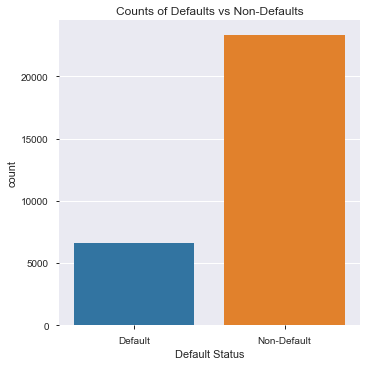

In [31]:
#Let's start with the basics, how many people are in default and how many are not
defcnt = sns.factorplot('default', data=data, kind='count')
defcnt.set(xticklabels=['Default','Non-Default'])
defcnt.set_xlabels('Default Status')
plt.title('Counts of Defaults vs Non-Defaults')
plt.show()

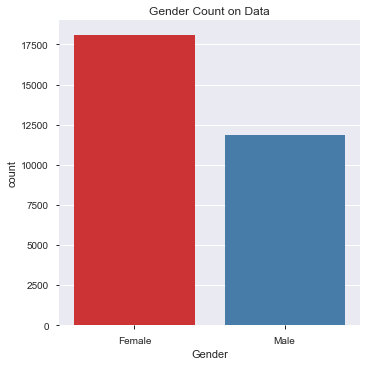

In [32]:
sexcnt= sns.factorplot('SEX', data=data, kind='count', palette='Set1')
sexcnt.set_xlabels('Gender')
sexcnt.set(xticklabels=['Female','Male'])
plt.title('Gender Count on Data')
plt.show()

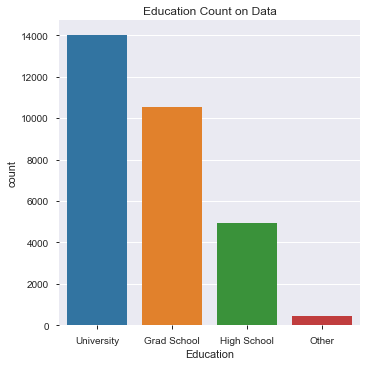

In [33]:
#Using "dataog" because it is the data used before we converted everything to boolean variables
educnt = sns.factorplot('EDUCATION', data=dataog, kind='count')
educnt.set_xlabels('Education')
educnt.set(xticklabels=['University','Grad School','High School','Other'])
plt.title('Education Count on Data')
plt.show()

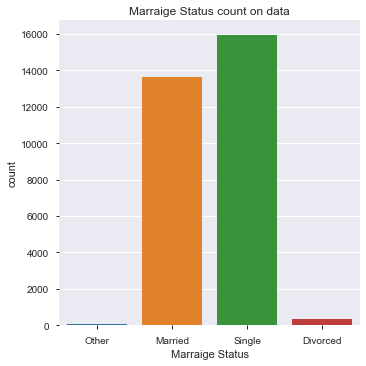

In [34]:
marcnt = sns.factorplot('MARRIAGE', data=dataog, kind='count')
marcnt.set(xticklabels=['Other','Married','Single','Divorced'])
marcnt.set_xlabels('Marraige Status')
plt.title('Marraige Status count on data')
plt.show()

In [35]:
data['AGE'].describe()

count    29965.000000
mean        35.487969
std          9.219459
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

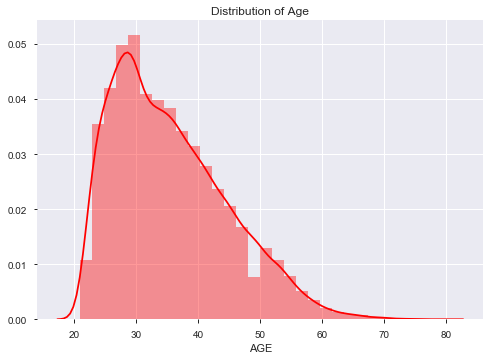

In [36]:
agedist = sns.distplot(data['AGE'], bins = 30, color='r')
plt.title('Distribution of Age')
plt.show()

C:\Users\Marlos\Anaconda3\envs\Task1Env\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


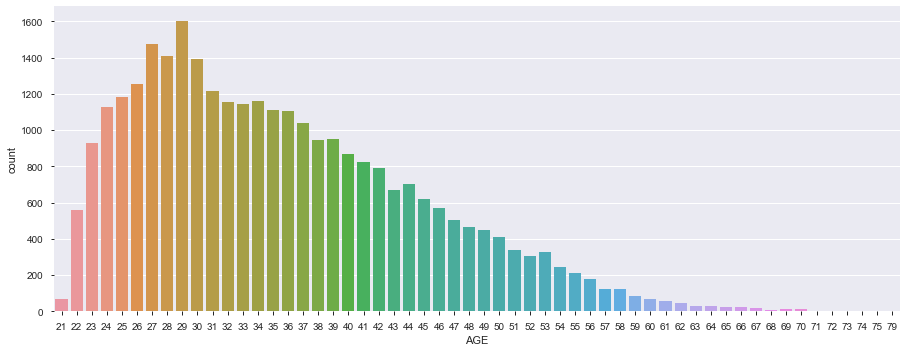

In [37]:
#Visualize the age range in out dataset
ageplt = sns.factorplot('AGE', data= data, kind = 'count', aspect=2.5)

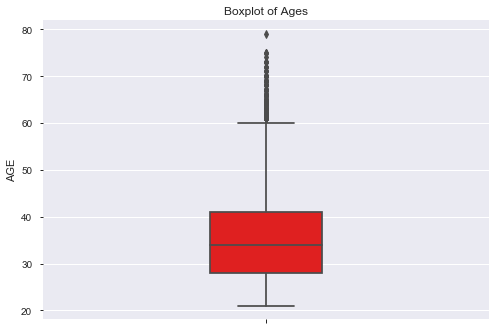

In [38]:
agebx = sns.boxplot(data['AGE'], orient='v', color ='r',width=.25)
plt.title('Boxplot of Ages')
plt.show()

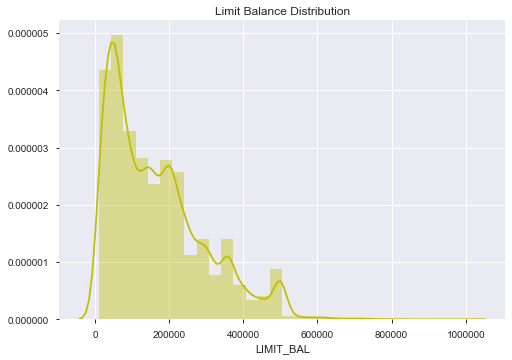

In [39]:
limdist = sns.distplot(data['LIMIT_BAL'], bins=30, color='y')
plt.title('Limit Balance Distribution')
plt.show()

In [40]:
data['LIMIT_BAL'].describe()

count      29965.000000
mean      167442.005006
std       129760.135222
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

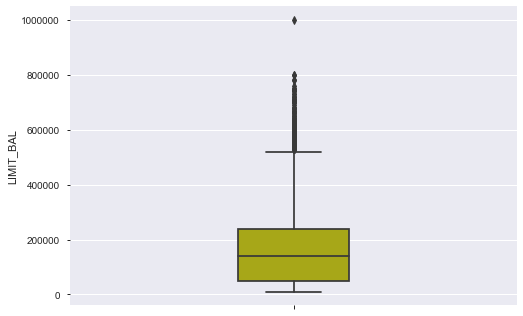

In [41]:
limbx = sns.boxplot(data['LIMIT_BAL'], orient='v', color='y', width=.25)

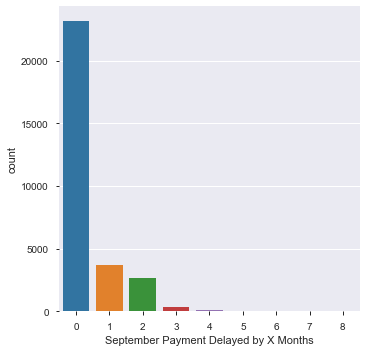

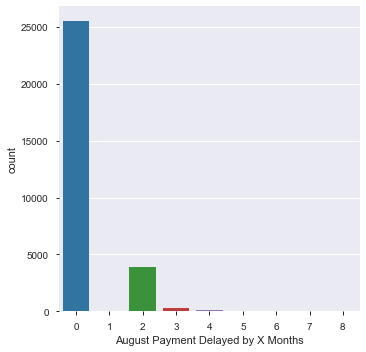

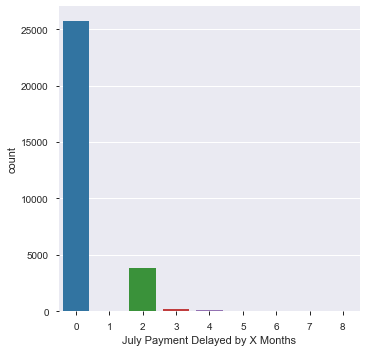

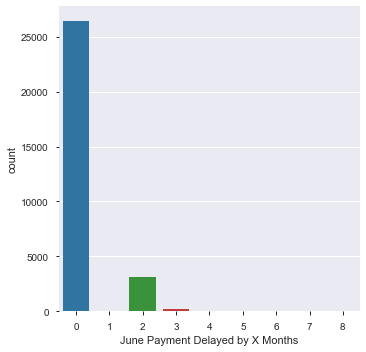

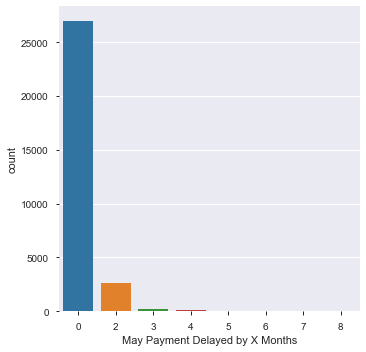

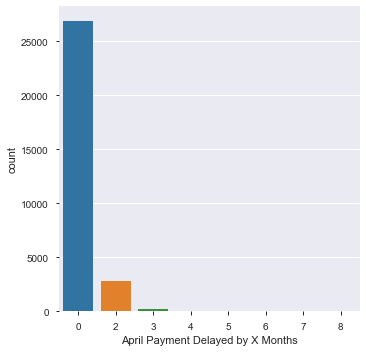

In [43]:
#Let's Analyze the "PAY_X" variables
payz = sns.factorplot('PAY_0', data=data, kind='count').set_xlabels('September Payment Delayed by X Months')
paytw = sns.factorplot('PAY_2', data=data, kind='count').set_xlabels('August Payment Delayed by X Months')
payth = sns.factorplot('PAY_3', data=data, kind='count').set_xlabels('July Payment Delayed by X Months')
payf = sns.factorplot('PAY_4', data=data, kind='count').set_xlabels('June Payment Delayed by X Months')
payfi = sns.factorplot('PAY_5', data=data, kind='count').set_xlabels('May Payment Delayed by X Months')
pays = sns.factorplot('PAY_6', data=data, kind='count').set_xlabels('April Payment Delayed by X Months')

Text(0.5, 1.0, 'BILL AMOUNT1 TO 3 BOXPLOT')

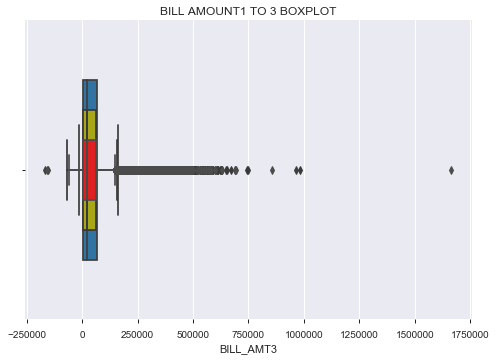

In [44]:
b1 = sns.boxplot(data['BILL_AMT1'], width=.60)
b2 = sns.boxplot(data['BILL_AMT2'], width=.40, color='y')
b3 = sns.boxplot(data['BILL_AMT3'], width=.20, color='r')
plt.title('BILL AMOUNT1 TO 3 BOXPLOT')

Text(0.5, 1.0, 'BILL AMOUNT4 TO 6 BOXPLOT')

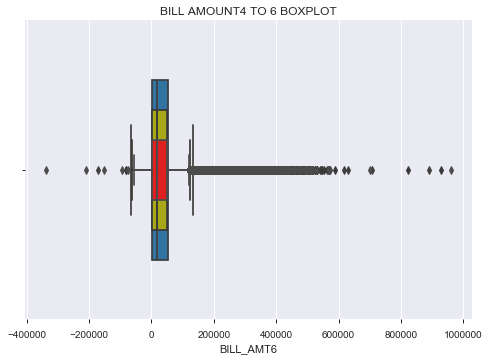

In [45]:
b4 = sns.boxplot(data['BILL_AMT4'], width=.60)
b5 = sns.boxplot(data['BILL_AMT5'], width=.40, color='y')
b6 = sns.boxplot(data['BILL_AMT6'], width=.20, color='r')
plt.title('BILL AMOUNT4 TO 6 BOXPLOT')

In [46]:
datapay = dataog
datapay = datapay.drop (['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1)
datapay = datapay.drop (['default','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)

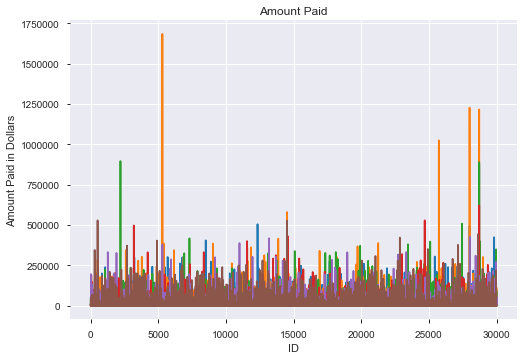

In [47]:
plt.plot(data['PAY_AMT1'])
plt.plot(data['PAY_AMT2'])
plt.plot(data['PAY_AMT3'])
plt.plot(data['PAY_AMT4'])
plt.plot(data['PAY_AMT5'])
plt.plot(data['PAY_AMT6'])
plt.title('Amount Paid')
plt.xlabel('ID')
plt.ylabel('Amount Paid in Dollars')
plt.show()

In [48]:
#Since there are many outliers the best way to explore the "PAY_AMT X" variables i through numbers and not graphs
datapay.describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000
mean,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014
std,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000
50%,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000
75%,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


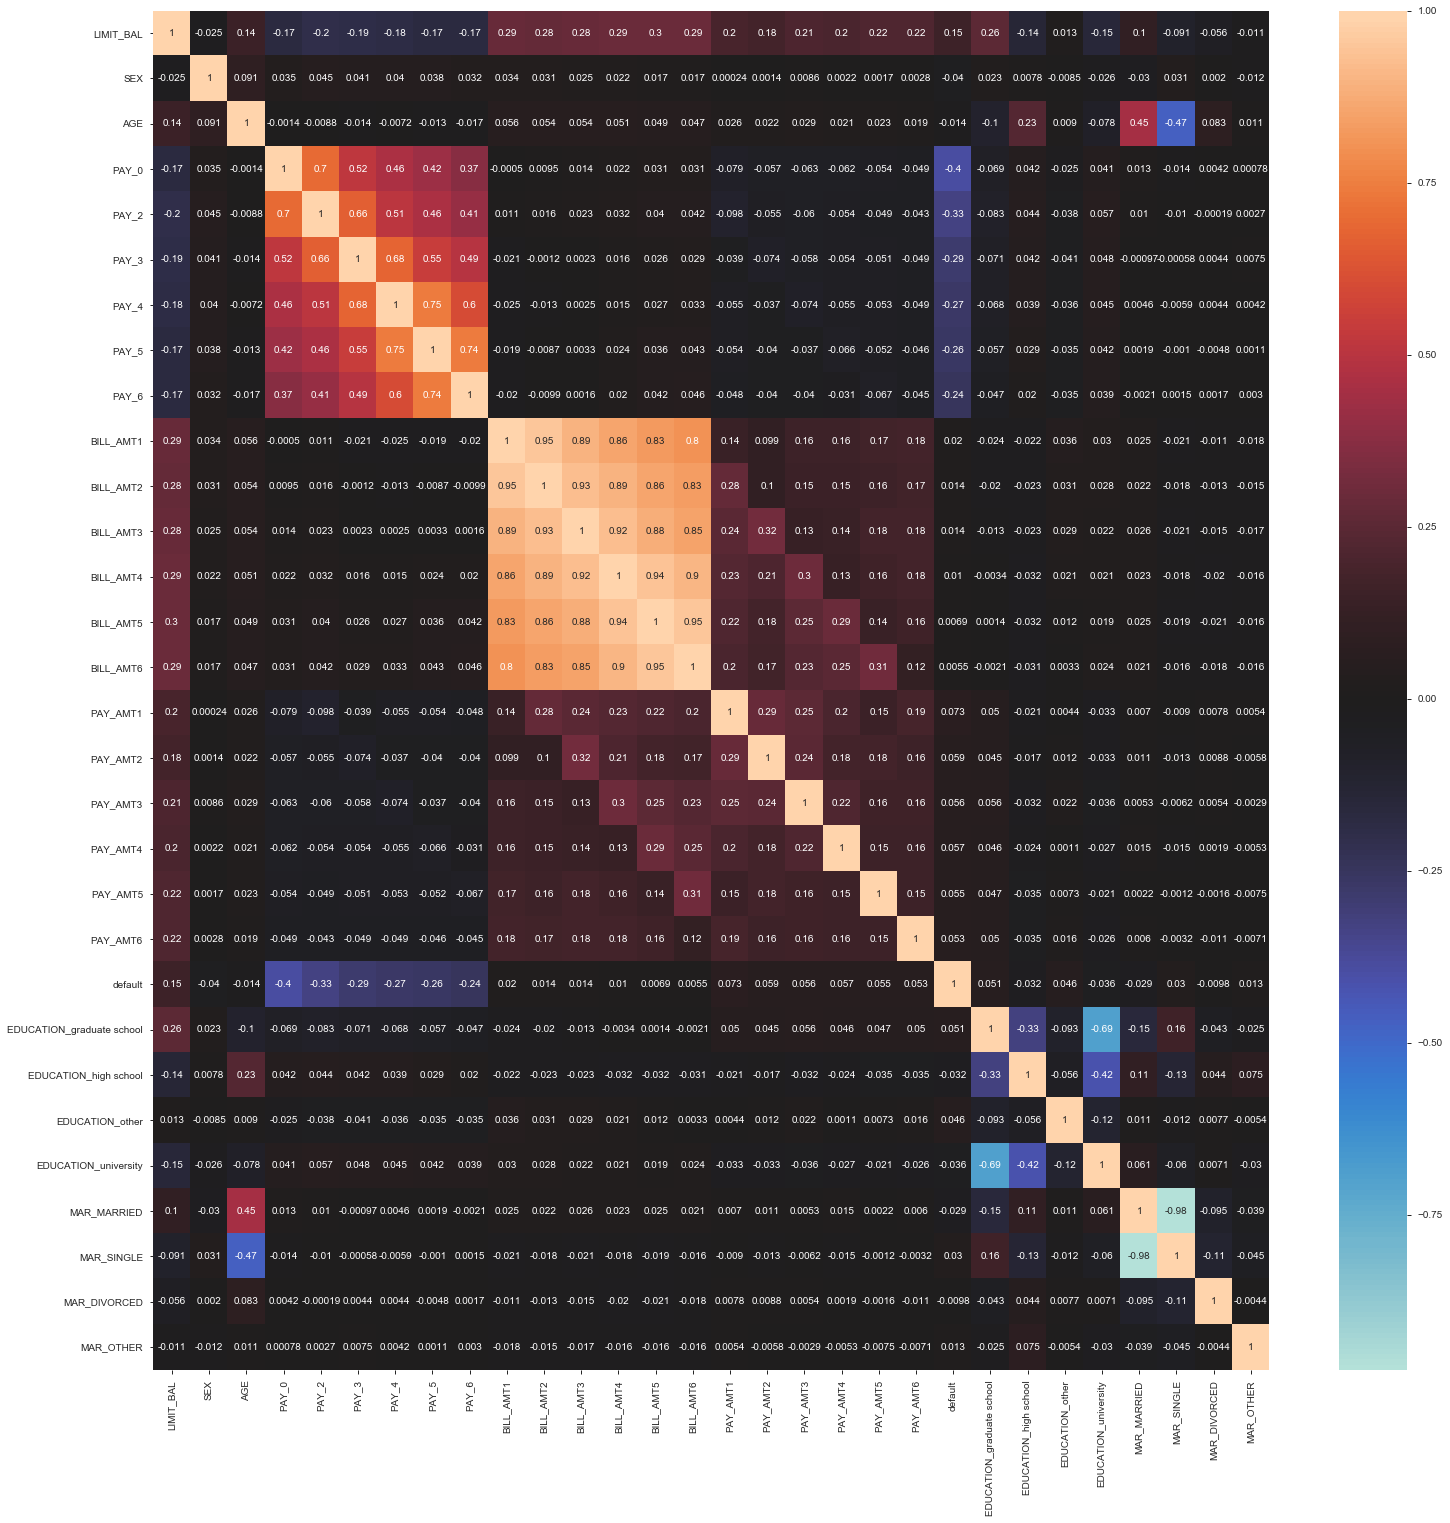

In [49]:
data_cor = data.corr()
plt.figure(figsize = (25,25))
sns.heatmap(data_cor, annot=True, center=0)
plt.show()

In [50]:
#Multivariate EDA

C:\Users\Marlos\Anaconda3\envs\Task1Env\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


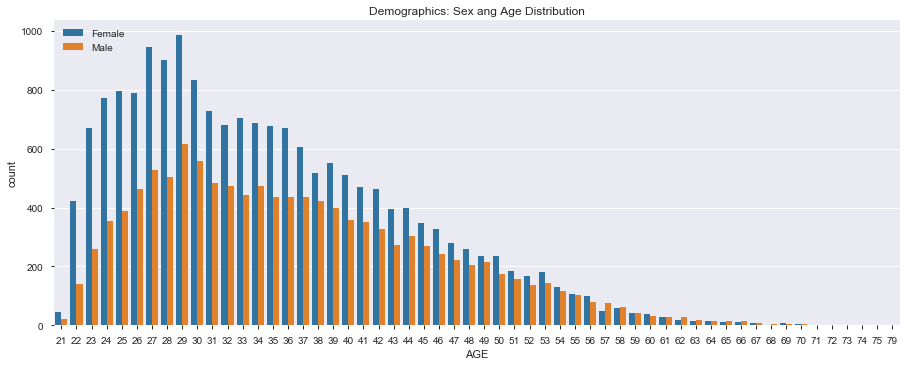

In [51]:
#Let's get a sense of what kind of demographics we have
lim = sns.factorplot('AGE',data=data, hue='SEX', kind='count', aspect=2.5, legend=False)
plt.legend(labels=['Female','Male'])
plt.title('Demographics: Sex ang Age Distribution')
plt.show()

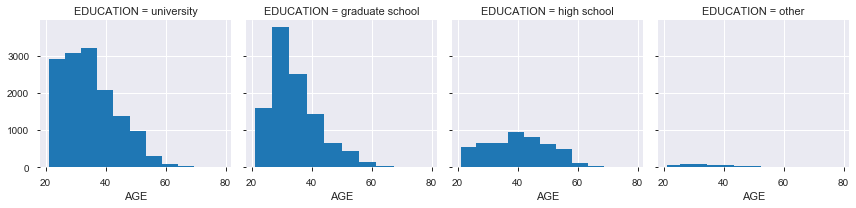

In [52]:
BILLA = sns.FacetGrid(dataog, col='EDUCATION')
BILLA.map(plt.hist, 'AGE')
plt.show()

In [53]:
#let's take a look at variables that are correlated to our Y value. Using samples to get a better taste of the trends

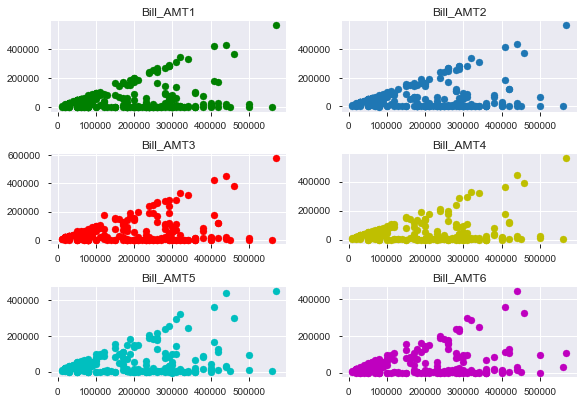

In [54]:
sample = data.sample(250)
fig, axs = plt.subplots(3,2, constrained_layout=True)
axs[0][0].scatter(sample['LIMIT_BAL'], sample['BILL_AMT1'], color='g')
axs[0][0].set_title('Bill_AMT1')
axs[0][1].scatter(sample['LIMIT_BAL'], sample['BILL_AMT2'])
axs[0][1].set_title('Bill_AMT2')
axs[1][0].scatter(sample['LIMIT_BAL'], sample['BILL_AMT3'], color='r')
axs[1][0].set_title('Bill_AMT3')
axs[1][1].scatter(sample['LIMIT_BAL'], sample['BILL_AMT4'], color='y')
axs[1][1].set_title('Bill_AMT4')
axs[2][0].scatter(sample['LIMIT_BAL'], sample['BILL_AMT5'], color ='c')
axs[2][0].set_title('Bill_AMT5')
axs[2][1].scatter(sample['LIMIT_BAL'], sample['BILL_AMT6'], color='m')
axs[2][1].set_title('Bill_AMT6')
plt.show()


In [55]:
#Since Bill AMT5 has the best correlation with limit balance, let's see if there is any relation between
#this relationship and what people go to default

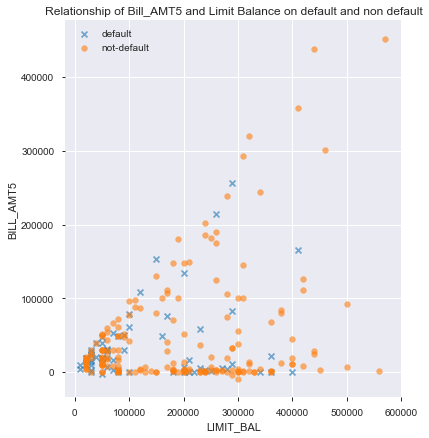

In [56]:
neg = sns.FacetGrid(sample, hue='default', height=6, hue_kws={'marker':['x','o']})
neg.map(plt.scatter, 'LIMIT_BAL', 'BILL_AMT5',s=35,alpha=.6)
plt.legend(labels=['default','not-default'])
plt.title('Relationship of Bill_AMT5 and Limit Balance on default and non default')
plt.show()


In [57]:
#Looking at the chart it seems that people that owe more are commonly the ones that go into default more often

In [58]:
# Let's separate the same graph even more and plot it by sex, see if there is something there

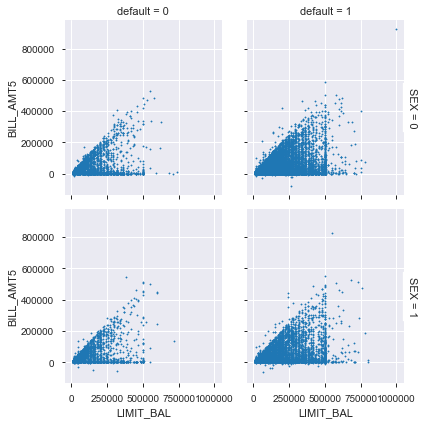

In [59]:
newg = sns.FacetGrid(data, row='SEX', col='default', margin_titles=True)
newg.map(plt.scatter, 'LIMIT_BAL', 'BILL_AMT5', s=2)
plt.show()

In [60]:
#Let's do something similar using level of education, we are expecting to see the most linear correlation in grad school

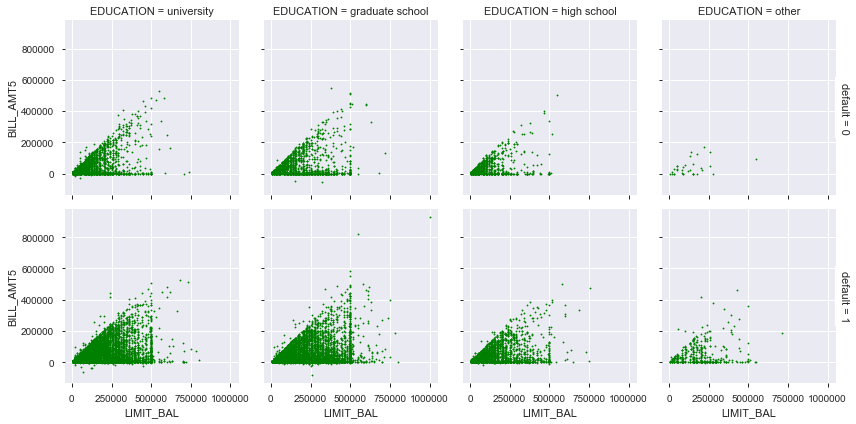

In [61]:
edug = sns.FacetGrid(dataog, row='default', col='EDUCATION', margin_titles=True)
edug.map(plt.scatter,'LIMIT_BAL','BILL_AMT5', s=2, color='g')

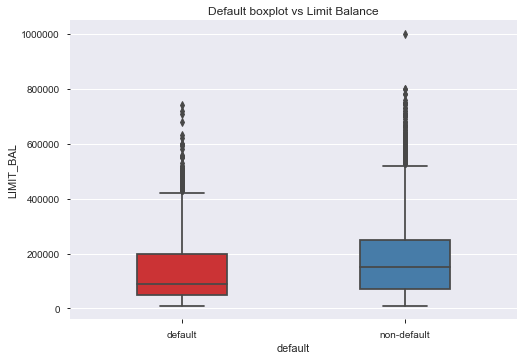

In [62]:
axt = sns.boxplot('default','LIMIT_BAL', data=data, width=.4, palette='Set1')
axt.set(xticklabels=['default','non-default'])
plt.title('Default boxplot vs Limit Balance')
plt.show()

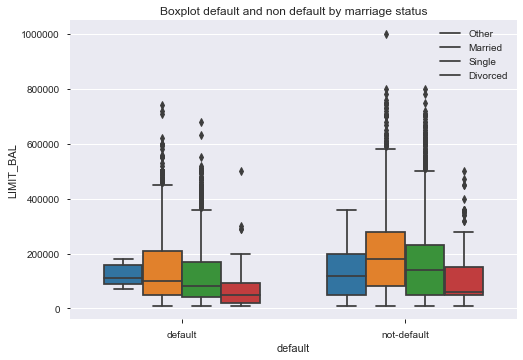

In [63]:
boxpt = sns.boxplot('default', 'LIMIT_BAL',data=dataog, hue='MARRIAGE', width=.7)
boxpt.set(xticklabels=['default','not-default'])
plt.legend(labels=['Other','Married','Single','Divorced'])
plt.title('Boxplot default and non default by marriage status')
plt.show()

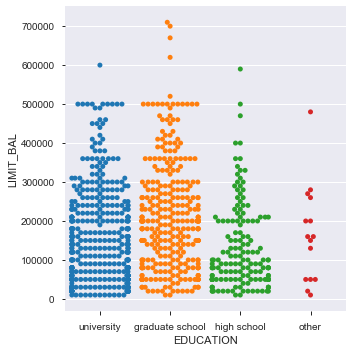

In [64]:
sampleog =dataog.sample(1000)
sns.catplot(x='EDUCATION', y='LIMIT_BAL', kind='swarm', data=sampleog)

In [65]:
#Modeling

In [66]:
#Feauture Selection

In [67]:
catdata = data[['EDUCATION_graduate school','EDUCATION_high school','EDUCATION_other','EDUCATION_university',
                'SEX','default','MAR_MARRIED','MAR_SINGLE','MAR_DIVORCED','MAR_OTHER']]

In [68]:
contdata = data.drop(columns=['EDUCATION_graduate school','EDUCATION_high school','EDUCATION_other','EDUCATION_university',
                'SEX','default','MAR_MARRIED','MAR_SINGLE','MAR_DIVORCED','MAR_OTHER'])

In [69]:
#In order to do feauture selection we will be filtering based on variance of categorical data and correlation of continuos
corrscores = abs(data.corr()['LIMIT_BAL'])
varscores = catdata.var()

In [70]:
print(corrscores.nlargest(30))

LIMIT_BAL                    1.000000
BILL_AMT5                    0.295999
BILL_AMT4                    0.294428
BILL_AMT6                    0.290816
BILL_AMT1                    0.285877
BILL_AMT3                    0.283671
BILL_AMT2                    0.278753
EDUCATION_graduate school    0.258512
PAY_AMT6                     0.219807
PAY_AMT5                     0.217421
PAY_AMT3                     0.210375
PAY_AMT4                     0.203451
PAY_2                        0.197039
PAY_AMT1                     0.195454
PAY_3                        0.191185
PAY_4                        0.180492
PAY_AMT2                     0.178584
PAY_0                        0.170975
PAY_5                        0.169903
PAY_6                        0.167674
default                      0.153871
EDUCATION_university         0.147280
AGE                          0.144643
EDUCATION_high school        0.139583
MAR_MARRIED                  0.103641
MAR_SINGLE                   0.090932
MAR_DIVORCED

In [71]:
print(varscores.nlargest(30))

MAR_SINGLE                   0.248977
EDUCATION_university         0.248974
MAR_MARRIED                  0.248010
SEX                          0.239246
EDUCATION_graduate school    0.228255
default                      0.172309
EDUCATION_high school        0.137125
EDUCATION_other              0.015375
MAR_DIVORCED                 0.010663
MAR_OTHER                    0.001799
dtype: float64


In [72]:
#Based on this we will drop all MARRIAGE columns, MERGE allnon grad school education, and drop SEX

In [73]:
dataf = data.drop(columns=['MAR_OTHER','MAR_DIVORCED','MAR_MARRIED','MAR_SINGLE'])

In [74]:
dataf['EDU_nongrad'] = data['EDUCATION_other']+data['EDUCATION_high school']+data['EDUCATION_university']

In [75]:
dataf = dataf.drop(columns=['EDUCATION_other','EDUCATION_high school','EDUCATION_university', 'SEX'])

In [76]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  29965 non-null  int64
 1   AGE                        29965 non-null  int64
 2   PAY_0                      29965 non-null  int64
 3   PAY_2                      29965 non-null  int64
 4   PAY_3                      29965 non-null  int64
 5   PAY_4                      29965 non-null  int64
 6   PAY_5                      29965 non-null  int64
 7   PAY_6                      29965 non-null  int64
 8   BILL_AMT1                  29965 non-null  int64
 9   BILL_AMT2                  29965 non-null  int64
 10  BILL_AMT3                  29965 non-null  int64
 11  BILL_AMT4                  29965 non-null  int64
 12  BILL_AMT5                  29965 non-null  int64
 13  BILL_AMT6                  29965 non-null  int64
 14  PAY_AMT1              

In [77]:
#With that we dropped 7 columns which will help save memory and hopefully build a better model

In [78]:
#feautures
X = dataf.drop(columns=['LIMIT_BAL'])
y = dataf['LIMIT_BAL']

In [79]:
#Model Selection

In [80]:
algosClass=[]
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support  Vector Regression', SVR()))

In [81]:
#Regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model,  X, y, cv=3 )
    names.append(name)
    results.append(result)

In [82]:
for i in range (len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.4595749520986156
Linear Regression 0.2730494711340575
Support  Vector Regression -0.05029139899422619


In [83]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [84]:
#Model Selected
algo = RandomForestRegressor()
model = algo.fit(X_train, y_train)

In [85]:
#Making Predictions
predictions = model.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test, predictions)
print ('R Squared: %.3f' % predRsquared)
print ('RMSE: %3f' % RMSE)

R Squared: 0.468
RMSE: 94488.499729


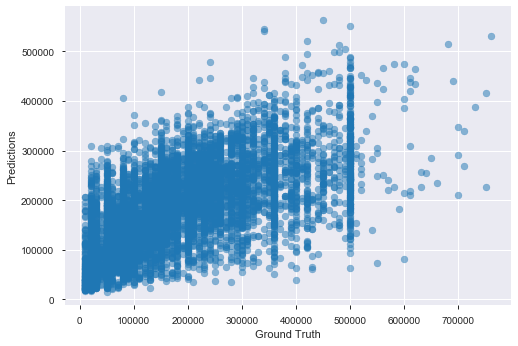

In [86]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()